# OT-guided regression (using MP components)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ot
from sklearn.linear_model import LinearRegression

from utils import plot_maxproj, pixel_dist_3d

In [3]:
np.random.seed(1993)

In [7]:
x1 = np.array([20, 10, 3])
x2 = np.array([10, 15, 3])

# Affine transformation to apply to source image
#theta = np.pi / 16
#beta = np.array([
#    [np.cos(theta), -np.sin(theta), 0], 
#    [np.sin(theta),  np.cos(theta), 0],
#    [0,              0,             1]
#])
beta = np.eye(3, 3)
alpha = np.array([10, 5, 0])
#alpha = np.array([0, 0, 0])

x3 = beta @ x1 + alpha
x4 = beta @ x2 + alpha

### Compute optimal transport plan between frames

In [9]:
# Normalized pixel distance matrix 
#M_nn = pixel_dist_3d(*img_shape)
#M = M_nn / np.median(M_nn)

# Entropic regularization parameter
#reg = 1e-3

In [10]:
# Compute transport plan
#P = ot.sinkhorn(frame_1.flatten(), frame_2.flatten(), M, reg, verbose=False)

### Compute values used for all regression methods

### Method 4: Weights are values from P matrix

MSE (alpha):  4.2667
MSE (beta):   0.0062
SE  (img):    0.0011
alpha (est):
[8.77848333 8.36199926 0.07096308]
beta (est):
[[ 1.00868565e+00  9.11713171e-02 -1.26977069e-03]
 [-5.35103802e-02  7.89872804e-01  1.16703836e-03]
 [-1.32680075e-04 -6.02245604e-04  9.73498222e-01]]


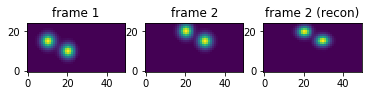

In [16]:
pts = grid.reshape(-1, 3)

threshold = 1e-7
x_idx, y_idx = np.nonzero(P > threshold)

pts_x = pts[x_idx]
pts_y = pts[y_idx]
weights = P[x_idx, y_idx]

wls_3 = LinearRegression(fit_intercept=True)
wls_3.fit(pts_x, pts_y, sample_weight=weights)

print_regression_report(wls_3.intercept_, wls_3.coef_, verbose=True)